In [1]:
import glob
import pandas as pd
import os

In [2]:
def feature_counts(directory):
    fn = directory+ '/feature_names.txt'
    with open(fn) as f:
        lines = f.readlines()
        keep = int(lines[1].split('\t')[1])
        remove = int(lines[2].split('\t')[1])
    return keep, remove

In [6]:
def load_cv(top=None):
    results = []
    seeds=[]
    for seed_dir in glob.glob('data/experiment/*'):
        seed = int(seed_dir.split('_')[-1])
        seeds.append(seed)
        dfs = []
        for params_dir in glob.glob(seed_dir+'/*/'):
            fn= os.path.normpath(params_dir+'/cv_5_best_models_evaluation.csv')
            dirs = fn.split(os.sep)
            params = dirs[3].split('#')
            params.insert(0, seed)
            keep, remove = feature_counts(params_dir)
            params.append(keep)
            params.append(remove)

            df = pd.read_csv(fn)
            df.columns = ['kind', 'model'] + df.columns[2:].tolist()
            params = pd.DataFrame([params]*df.shape[0], columns=['seed', 'total or by type', 'time period', 'data scaling', 'feature selection', 'keep', 'remove'])
            df = pd.concat([params, df], axis=1)
            dfs.append(df)

        dfs = pd.concat(dfs, ignore_index=True).sort_values('test_f1', ascending=False)
        if top is not None:
            dfs = dfs.head(top)
        results.append(dfs)
    return pd.concat(results, ignore_index=True), seeds

In [4]:
%matplotlib inline

In [9]:
df, seeds = load_cv()
# df = df.set_index(['seed', 'total or by type', 'time period', 'data scaling', 'feature selection'])

# df.reset_index().test_f1.hist()
# df.reset_index()

In [10]:
df['key'] = df.apply(lambda x: '%s %s %s %s %s'.strip() % (x['total or by type'], x['time period'], x['model'], x['data scaling'], x['feature selection']), axis=1)     

In [16]:
df.columns

Index(['seed', 'total or by type', 'time period', 'data scaling',
       'feature selection', 'keep', 'remove', 'kind', 'model', 'test_acc',
       'test_f1', 'test_mse', 'train_acc', 'train_f1', 'train_mse', 'key'],
      dtype='object')

In [19]:
clean_res = df[['test_f1', 'key']]

In [20]:
%matplotlib inline

In [26]:
means = clean_res.groupby('key').mean().sort_values('test_f1', ascending=False)
stds = clean_res.groupby('key').std()
means_to_plot = means.head(3)
index_to_plot = means_to_plot.index
means_to_plot

,test_f1
key,
NO_TOTAL ~2016 GDBcls max_cut None,0.718082
NO_TOTAL ~2016 GDBcls minmax_only None,0.716024
NO_TOTAL ~2014 GDBcls minmax_only None,0.715918


In [27]:

stds_to_plot = stds.loc[index_to_plot]
stds_to_plot

,test_f1
key,
NO_TOTAL ~2016 GDBcls max_cut None,0.008577
NO_TOTAL ~2016 GDBcls minmax_only None,0.009901
NO_TOTAL ~2014 GDBcls minmax_only None,0.010080


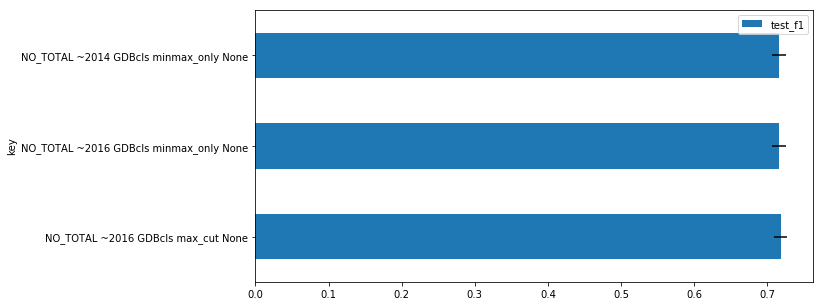

In [24]:
means_to_plot.plot(kind='barh', xerr=stds_to_plot, figsize=(10,5))

In [25]:
clean_res[clean_res.key.isin(index_to_plot[:1])]

,test_f1,key
4,0.715574,NO_TOTAL ~2016 GDBcls max_cut None
72,0.727970,NO_TOTAL ~2016 GDBcls max_cut None
146,0.711532,NO_TOTAL ~2016 GDBcls max_cut None
220,0.709863,NO_TOTAL ~2016 GDBcls max_cut None
288,0.714291,NO_TOTAL ~2016 GDBcls max_cut None
366,0.717031,NO_TOTAL ~2016 GDBcls max_cut None
434,0.705741,NO_TOTAL ~2016 GDBcls max_cut None
504,0.719101,NO_TOTAL ~2016 GDBcls max_cut None
576,0.729038,NO_TOTAL ~2016 GDBcls max_cut None
651,0.730681,NO_TOTAL ~2016 GDBcls max_cut None


{'TOTAL': 19, 'NO_TOTAL': 11}
{'~2014': 16, '~2016': 14}
{'max_cut': 16, 'minmax_only': 14}
{'rfecv_linsvc': 14, 'None': 9, 'mrmr': 7}
{'GDBcls': 6, 'RFcls': 4, 'MLPcls': 3, 'SVM': 3, 'BAGcls': 3, 'linearSVM': 3, 'ols': 2, 'linearSVR': 1, 'ADAreg': 1, 'GDBreg': 1, 'MLPreg': 1, 'DTcls': 1, 'logistics': 1}


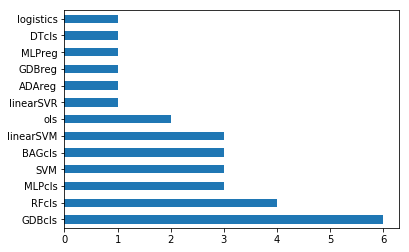

In [19]:
df2 = df.reset_index()
print(df2['total or by type'].value_counts().to_dict())
print(df2['time period'].value_counts().to_dict())
print(df2['data scaling'].value_counts().to_dict())
print(df2['feature selection'].value_counts().to_dict())
print(df2.model.value_counts().to_dict())
df2.model.value_counts().plot(kind='barh')

In [10]:
df.loc[100]

keep  remove kind   model  \
total_or_not years transform   ftr_sel                                   
NO_TOTAL     ~2016 max_cut     None           178       0  cls  GDBcls   
                   minmax_only None           178       0  cls  GDBcls   
                   max_cut     rfecv_linsvc   147      31  cls  GDBcls   

                                             test_acc   test_f1  test_mse  \
total_or_not years transform   ftr_sel                                      
NO_TOTAL     ~2016 max_cut     None          0.734487  0.727970  0.553215   
                   minmax_only None          0.732982  0.726508  0.564498   
                   max_cut     rfecv_linsvc  0.731102  0.724759  0.568259   

                                             train_acc  train_f1  train_mse  
total_or_not years transform   ftr_sel                                       
NO_TOTAL     ~2016 max_cut     None                1.0       1.0        0.0  
                   minmax_only None                1.0       1.0        0.0  
                   max_cut     rfecv_linsvc        1.0       1.0        0.0

In [11]:
df.sort_values('test_f1', ascending=False)

keep  remove kind  \
seed      total_or_not years transform   ftr_sel                           
972       NO_TOTAL     ~2016 minmax_only rfecv_linsvc   137      41  cls   
                       ~2014 minmax_only None           230       0  cls   
                       ~2016 minmax_only None           178       0  cls   
789729423 NO_TOTAL     ~2016 max_cut     None           178       0  cls   
100       NO_TOTAL     ~2016 max_cut     None           178       0  cls   
789729423 NO_TOTAL     ~2016 minmax_only rfecv_linsvc   178       0  cls   
100       NO_TOTAL     ~2016 minmax_only None           178       0  cls   
789729423 NO_TOTAL     ~2014 max_cut     None           230       0  cls   
100       NO_TOTAL     ~2016 max_cut     rfecv_linsvc   147      31  cls   
5258      NO_TOTAL     ~2014 max_cut     None           230       0  cls   
0         NO_TOTAL     ~2014 max_cut     rfecv_linsvc   194      36  cls   
5258      NO_TOTAL     ~2014 max_cut     mrmr           176      54  cls   
                             minmax_only None           230       0  cls   
7821      NO_TOTAL     ~2016 max_cut     None           178       0  cls   
0         NO_TOTAL     ~2014 minmax_only None           230       0  cls   
                             max_cut     None           230       0  cls   
7821      NO_TOTAL     ~2016 max_cut     rfecv_linsvc   145      33  cls   
291592    NO_TOTAL     ~2014 max_cut     mrmr           176      54  cls   
40918     NO_TOTAL     ~2016 max_cut     None           178       0  cls   
291592    NO_TOTAL     ~2014 max_cut     None           230       0  cls   
7821      NO_TOTAL     ~2016 minmax_only None           178       0  cls   
168352    NO_TOTAL     ~2014 minmax_only None           230       0  cls   
                       ~2016 minmax_only rfecv_linsvc   135      43  cls   
                             max_cut     None           178       0  cls   
40918     NO_TOTAL     ~2016 minmax_only None           178       0  cls   
291592    NO_TOTAL     ~2016 max_cut     mrmr           150      28  cls   
57852     NO_TOTAL     ~2016 minmax_only rfecv_linsvc   140      38  cls   
                             max_cut     rfecv_linsvc   131      47  cls   
40918     NO_TOTAL     ~2016 max_cut     rfecv_linsvc   139      39  cls   
57852     NO_TOTAL     ~2016 max_cut     None           178       0  cls   

                                                        model  test_acc  \
seed      total_or_not years transform   ftr_sel                          
972       NO_TOTAL     ~2016 minmax_only rfecv_linsvc  GDBcls  0.743889   
                       ~2014 minmax_only None          GDBcls  0.742384   
                       ~2016 minmax_only None          GDBcls  0.740504   
789729423 NO_TOTAL     ~2016 max_cut     None          GDBcls  0.737119   
100       NO_TOTAL     ~2016 max_cut     None          GDBcls  0.734487   
789729423 NO_TOTAL     ~2016 minmax_only rfecv_linsvc  GDBcls  0.735239   
100       NO_TOTAL     ~2016 minmax_only None          GDBcls  0.732982   
789729423 NO_TOTAL     ~2014 max_cut     None          GDBcls  0.734863   
100       NO_TOTAL     ~2016 max_cut     rfecv_linsvc  GDBcls  0.731102   
5258      NO_TOTAL     ~2014 max_cut     None          GDBcls  0.732230   
0         NO_TOTAL     ~2014 max_cut     rfecv_linsvc  GDBcls  0.730726   
5258      NO_TOTAL     ~2014 max_cut     mrmr          GDBcls  0.729598   
                             minmax_only None          GDBcls  0.729598   
7821      NO_TOTAL     ~2016 max_cut     None          GDBcls  0.727341   
0         NO_TOTAL     ~2014 minmax_only None          GDBcls  0.725837   
                             max_cut     None          GDBcls  0.725461   
7821      NO_TOTAL     ~2016 max_cut     rfecv_linsvc  GDBcls  0.723956   
291592    NO_TOTAL     ~2014 max_cut     mrmr          GDBcls  0.722828   
40918     NO_TOTAL     ~2016 max_cut     None          GDBcls  0.723204   
291592    NO_TOTAL     ~2014 max_cut     None  